In [1]:
# In this notebook, I will build two models to classify MNIST digits: a simple ANN and a more powerful CNN. I will compare their performance and show which model is better for image classification.

In [2]:
# Importing libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Training input data shape: ", x_train.shape)
print("Training target data shape: ", y_train.shape)
print("Test input data shape: ", x_test.shape)
print("Test target data shape: ", y_test.shape)

Training input data shape:  (60000, 28, 28)
Training target data shape:  (60000,)
Test input data shape:  (10000, 28, 28)
Test target data shape:  (10000,)


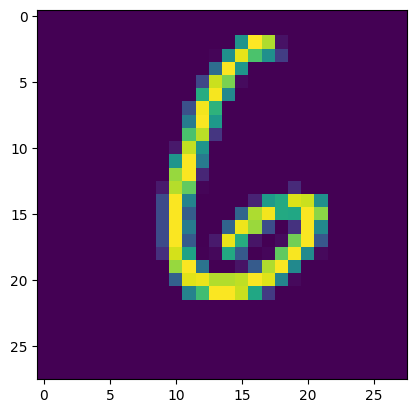

In [5]:
# Confirming if the numpy arrays are digit images
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
i = np.random.randint(1,100)
plt.imshow(x_train[i])

In [6]:
# Data preprocessing
x_train = x_train/255
x_test = x_test/255

In [7]:
i = np.random.randint(1,100)
x_train[i]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
ann = Sequential()
ann.add(Flatten(input_shape = (28,28)))
ann.add(Dense(128, activation = 'relu'))
ann.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
ann.compile(metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy', optimizer = 'Adam')

In [11]:
ann_history = ann.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8698 - loss: 0.4741 - val_accuracy: 0.9538 - val_loss: 0.1580
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9593 - loss: 0.1399 - val_accuracy: 0.9642 - val_loss: 0.1212
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9733 - loss: 0.0921 - val_accuracy: 0.9712 - val_loss: 0.0962
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0658 - val_accuracy: 0.9731 - val_loss: 0.0898
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0476 - val_accuracy: 0.9685 - val_loss: 0.0989
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0388 - val_accuracy: 0.9713 - val_loss: 0.0946
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0277 - val_accuracy: 0.9735 - val_loss: 0.0913
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0216 - 

In [12]:
ann_y_prob = ann.predict(x_test)
ann_y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.1965086e-15, 3.1142483e-17, 4.6860946e-09, ..., 9.9999875e-01,
        1.0541907e-11, 1.0164531e-09],
       [3.5061377e-14, 5.2914433e-09, 9.9999994e-01, ..., 1.3159126e-26,
        3.5738944e-13, 4.8514911e-27],
       [6.6910997e-09, 9.9983907e-01, 1.9629148e-05, ..., 1.0633617e-05,
        1.2977657e-04, 3.2819647e-10],
       ...,
       [7.2086336e-25, 6.2630476e-23, 8.5365329e-24, ..., 2.8999137e-13,
        1.1147680e-15, 1.5909861e-14],
       [5.6719732e-14, 3.1169422e-22, 1.3155309e-19, ..., 8.9595012e-15,
        9.5097175e-10, 1.1894406e-18],
       [3.1084362e-17, 4.1274960e-23, 1.6688113e-15, ..., 8.8815800e-29,
        3.6816596e-15, 1.3854590e-21]], dtype=float32)

In [13]:
ann_y_pred = ann_y_prob.argmax(axis=1) # Changing raw probabilites to predicted digits
ann_y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, ann_y_pred)

0.978

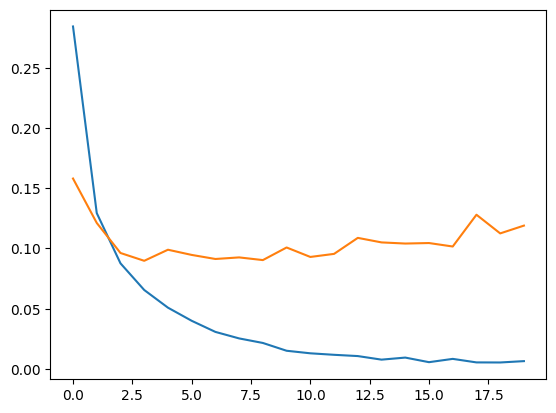

In [15]:
plt.plot(ann_history.history['loss']);
plt.plot(ann_history.history['val_loss']);

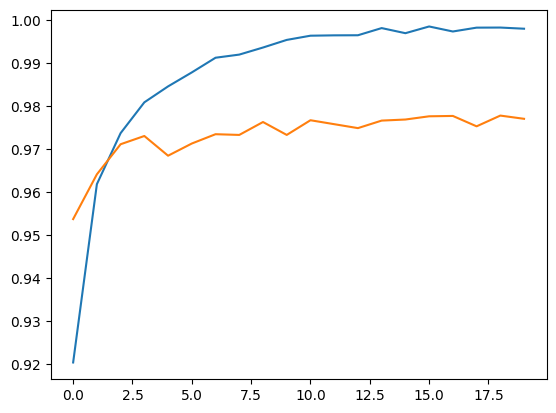

In [16]:
plt.plot(ann_history.history['accuracy']);
plt.plot(ann_history.history['val_accuracy']);

In [17]:
ann_conf_mat = confusion_matrix(y_test, ann_y_pred)
ann_conf_mat

array([[ 969,    0,    2,    0,    1,    1,    2,    1,    2,    2],
       [   0, 1124,    4,    2,    0,    1,    2,    0,    2,    0],
       [   2,    0, 1013,    1,    1,    0,    3,    4,    8,    0],
       [   1,    1,    4,  988,    0,    5,    0,    5,    3,    3],
       [   1,    1,    3,    0,  961,    0,    2,    2,    2,   10],
       [   1,    0,    0,   10,    1,  869,    4,    2,    4,    1],
       [   4,    2,    1,    1,    8,    4,  935,    0,    3,    0],
       [   1,    4,    7,    4,    3,    0,    0,  997,    8,    4],
       [   2,    1,    3,    6,    5,    2,    0,    2,  952,    1],
       [   1,    3,    0,    4,   10,    5,    1,    9,    4,  972]])

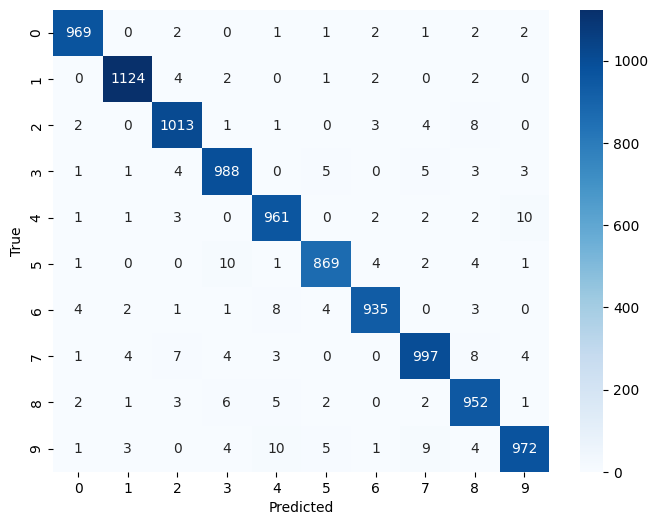

In [32]:
plt.figure(figsize=(8, 6));
sns.heatmap(ann_conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted');
plt.ylabel('True');

In [19]:
# Importing libraries
from keras.layers import Activation, Conv2D, MaxPooling2D, Dropout

In [20]:
# Resizing image for convolution operation
img_size = 28
x_train_new = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_test_new = np.array(x_test).reshape(-1, img_size, img_size, 1)
print("Training input sample shape:", x_train_new.shape)
print("Test input sample shape:", x_test_new.shape)

Training input sample shape: (60000, 28, 28, 1)
Test input sample shape: (10000, 28, 28, 1)


In [21]:
# Creating the model
cnn = Sequential()

# 1st convulational layer
cnn.add(Conv2D(64, kernel_size=(3,3), input_shape=x_train_new.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

# 2nd convulational layer
cnn.add(Conv2D(64, kernel_size=(3,3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

# 3rd convolutional layer
cnn.add(Conv2D(64,kernel_size=(3,3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

# 1st Fully connected layer
cnn.add(Flatten())
cnn.add(Dense(64))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))

# 2nd Fully connected layer
cnn.add(Dense(32))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))

# 3rd Fully connected layer
cnn.add(Dense(10))
cnn.add(Activation('softmax'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [24]:
cnn_history = cnn.fit(x_train_new, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 47ms/step - accuracy: 0.4336 - loss: 1.5581 - val_accuracy: 0.9612 - val_loss: 0.1516
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.8770 - loss: 0.4412 - val_accuracy: 0.9724 - val_loss: 0.0995
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9136 - loss: 0.3177 - val_accuracy: 0.9795 - val_loss: 0.0827
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9318 - loss: 0.2710 - val_accuracy: 0.9772 - val_loss: 0.0880
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9366 - loss: 0.2482 - val_accuracy: 0.9788 - val_loss: 0.0838
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9447 - loss: 0.2169 - val_accuracy: 0.9820 - val_loss: 0.0804
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 46ms/step - accuracy: 0.9463 - loss: 0.2129 - val_accuracy: 0.9834 - val_loss: 0.0660
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9475 -

In [25]:
cnn_y_prob = cnn.predict(x_test_new)
cnn_y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[2.63189184e-18, 1.50164811e-10, 2.14682558e-07, ...,
        9.99999702e-01, 1.51716955e-16, 5.69807439e-13],
       [2.01052899e-08, 1.87581718e-05, 9.99785900e-01, ...,
        6.53135503e-05, 7.48098955e-07, 1.11822622e-07],
       [6.06686197e-14, 9.99999940e-01, 2.69839298e-08, ...,
        7.24716565e-10, 1.00031485e-11, 2.94069047e-10],
       ...,
       [1.15621992e-24, 6.61402823e-18, 2.02130868e-18, ...,
        1.95476350e-22, 2.45034886e-19, 6.99272640e-10],
       [5.01668101e-17, 2.27830016e-13, 2.92398154e-11, ...,
        4.25307525e-16, 5.92437353e-08, 1.81097494e-05],
       [3.14092035e-15, 1.09283274e-27, 3.61756843e-20, ...,
        2.01192768e-29, 2.74258816e-14, 2.98668681e-17]], dtype=float32)

In [26]:
cnn_y_pred = cnn_y_prob.argmax(axis=1)
cnn_y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
accuracy_score(y_test, cnn_y_pred)

0.9865

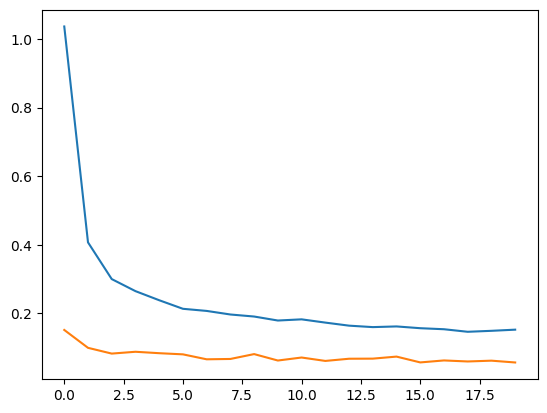

In [28]:
plt.plot(cnn_history.history['loss']);
plt.plot(cnn_history.history['val_loss']);

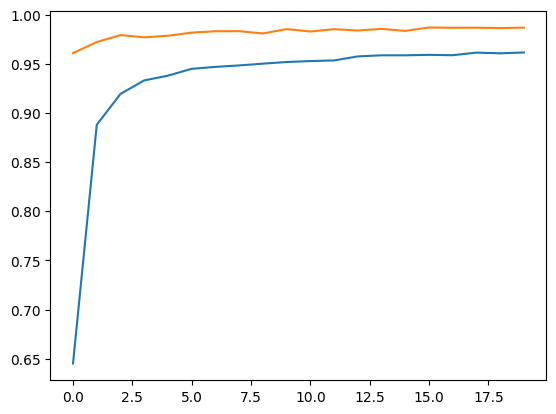

In [29]:
plt.plot(cnn_history.history['accuracy']);
plt.plot(cnn_history.history['val_accuracy']);

In [30]:
cnn_conf_mat = confusion_matrix(y_test, cnn_y_pred)
cnn_conf_mat

array([[ 975,    0,    0,    0,    2,    1,    1,    1,    0,    0],
       [   1, 1130,    1,    1,    0,    0,    0,    2,    0,    0],
       [   3,    1, 1010,    3,    1,    0,    1,   10,    3,    0],
       [   0,    0,    2, 1001,    0,    5,    0,    1,    1,    0],
       [   1,    0,    0,    0,  974,    0,    2,    0,    1,    4],
       [   3,    0,    0,    3,    0,  884,    1,    1,    0,    0],
       [   5,    2,    0,    0,    1,    3,  945,    0,    2,    0],
       [   1,    5,   13,    0,    0,    1,    0, 1007,    1,    0],
       [   3,    0,    3,    1,    2,    3,    2,    1,  955,    4],
       [   3,    1,    0,    0,    6,    9,    1,    2,    3,  984]])

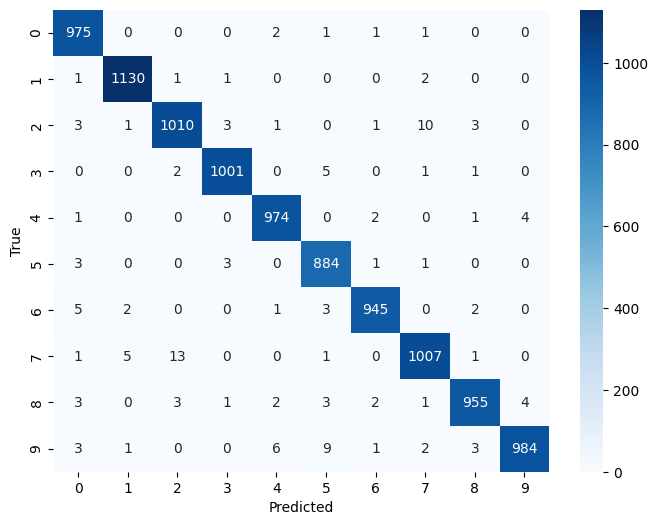

In [31]:
plt.figure(figsize=(8, 6));
sns.heatmap(cnn_conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted');
plt.ylabel('True');